# **Giới thiệu thư viện Seaborn**

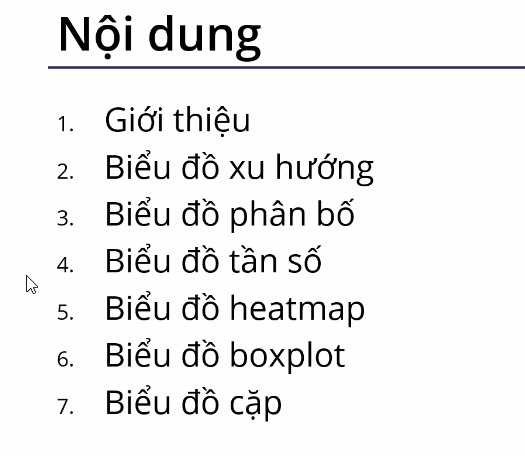

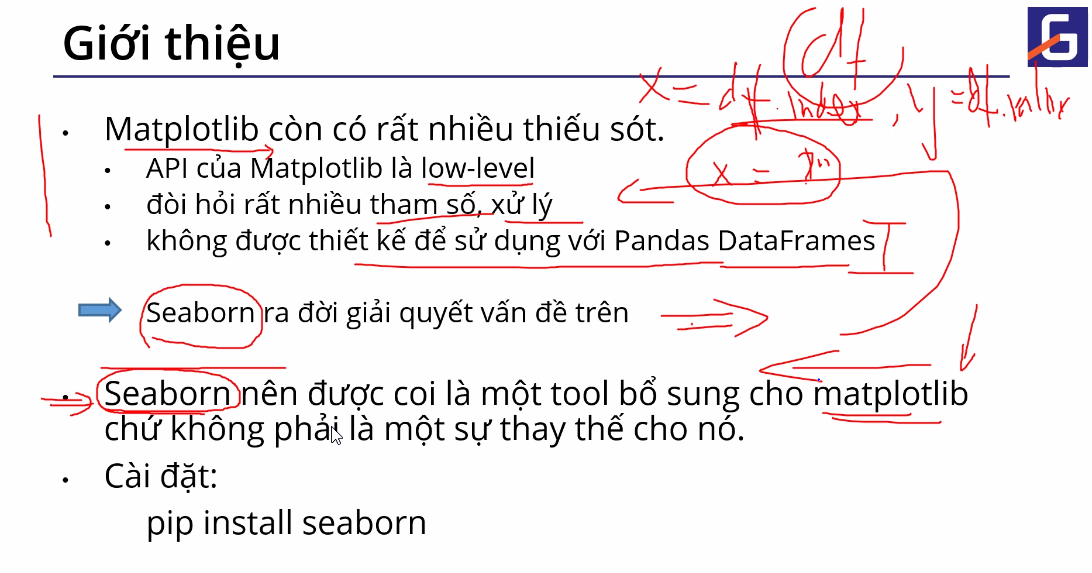

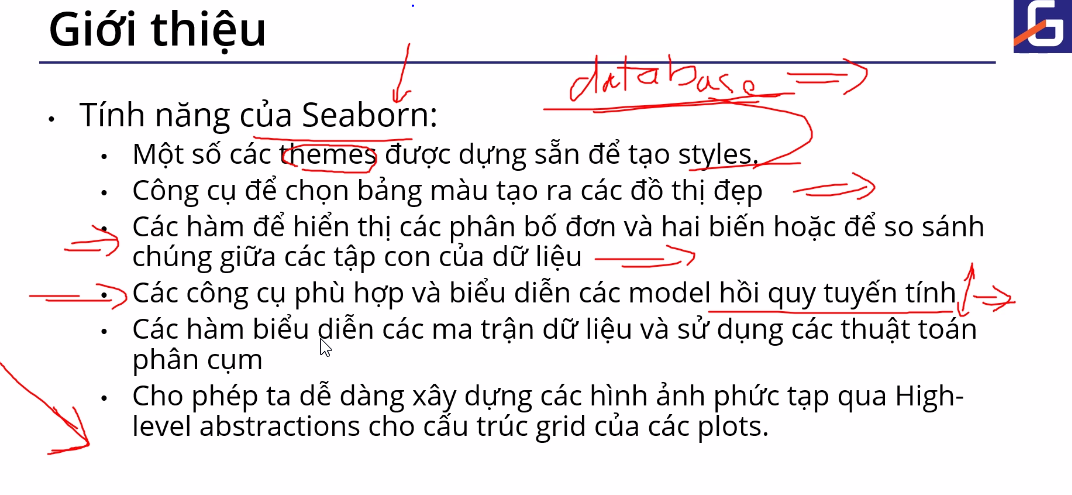

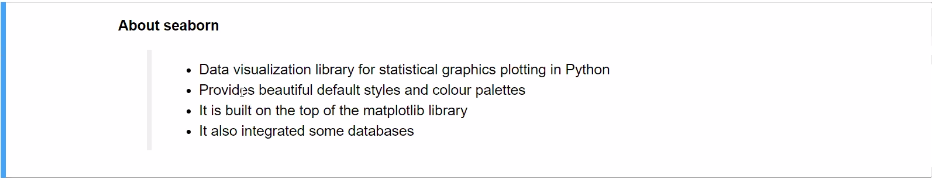

### **Importing library**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Database in seaborn**

In [66]:
# Dữ liệu phổ biến iris, titanic
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [17]:
# Load bộ dữ liệu tips có sẵn trong seaborn:
# tips: lưu thông tin tiền bo phục vụ
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


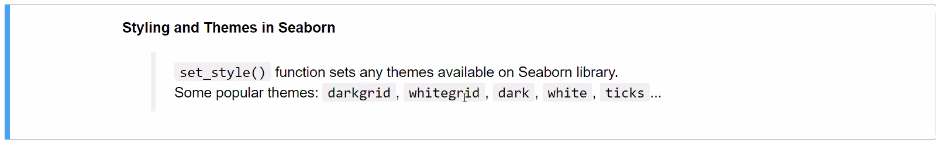

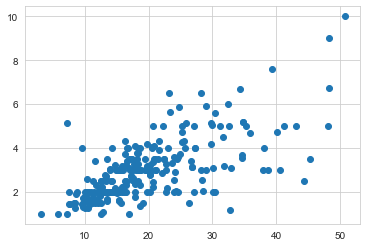

In [20]:
plt.scatter(tips.total_bill, tips.tip)
sns.set_style('darkgrid')
plt.show()

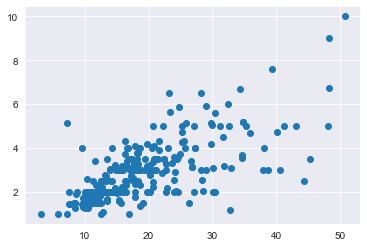

In [21]:
plt.scatter(tips.total_bill, tips.tip)
sns.set_style('whitegrid')
plt.show()

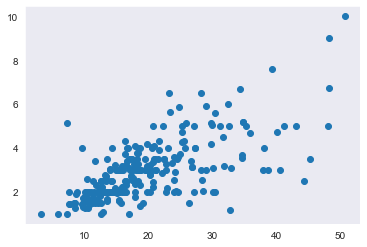

In [25]:
plt.scatter(tips.total_bill, tips.tip)
# default
plt.show()

**Nhận xét:**
- Ta thấy có khách hàng tip đến 10 đô, phần đông tiền tip 1 đô đến 4 đô
- Mối tương quan giữa tổng bill và tiền típ: Hóa đơn càng cao típ càng cao

### **1. Biểu độ xu hướng**

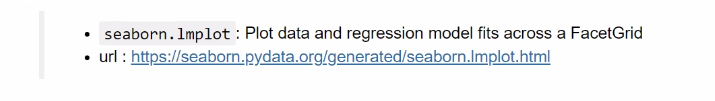

+ Cho thấy được xu hướng của dữ liệu
+ Dùng nhiều trong mô hình tuyến tính
+ Seaborn làm việc trực tiếp với DataFrame

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


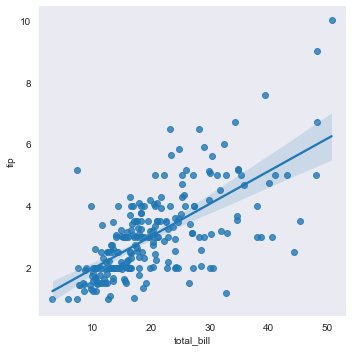

In [29]:
# Tiền tip phụ thuộc như thế nào so với tổng hóa đơn
# Biểu diễn total_bill ảnh hưởng như thế nào đến tiền tip
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

**Nhận xét:**
+ Mối quan hệ giữa total_bill và tip là mối quan hệ tuyến tính thuận (1 biến tăng thì biến còn lại tăng), nghĩa là hóa đơn càng cao tiền típ càng cao
+ Độ khác nhau giữa tiền típ là càng lớn, ví dụ bill lớn típ bé, bill lớn tip lớn

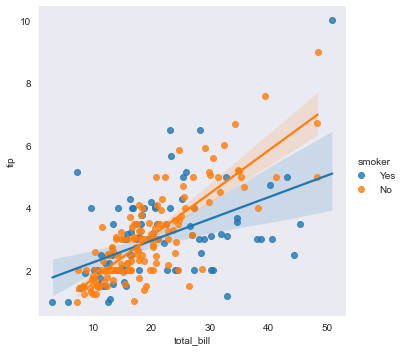

In [30]:
# Tách biệt 2 nhóm dữ liệu bằng tham số 'hue' nhưng vẫn nằm trên 1 axis
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

**Nhận xét:**
+ Nhìn vào biểu đồ ta thấy, những người không hút thuốc (đường dốc hơn) thì hóa đơn càng nhiều thì bo càng nhiều, và ngược lại.
+ Độ mở ra dữ liệu: Rất ít những người không hút thuốc thanh toán hóa đơn cao mà bo ít

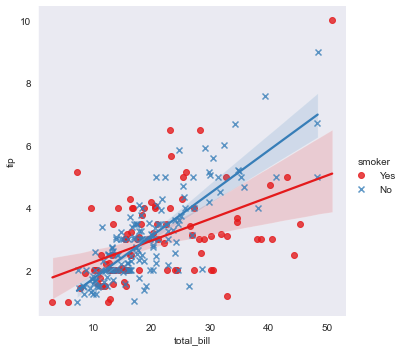

In [35]:
# markers tăng độ tương phản 2 nhóm dữ liệu
# palette: bảng màu
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers=['o', 'x'], palette='Set1', legend=True)

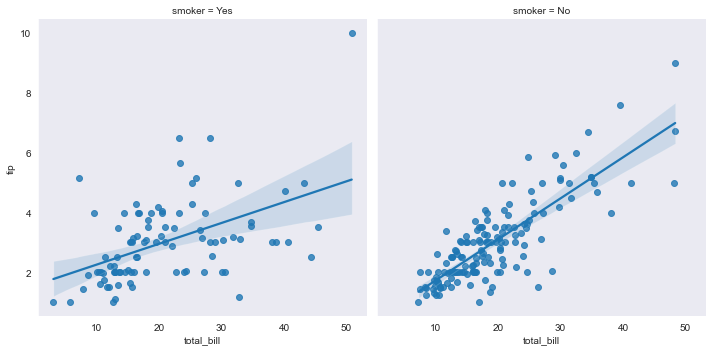

In [37]:
# Tách biệt 2 nhóm dữ liệu nằm trên 2 axis khác nhau dùng tham số 'col' hoặc 'row'
# Tách người hút thuốc và không hút thuốc ra làm 2 biểu đồ
sns.lmplot(x='total_bill', y='tip', col='smoker', data=tips)

### **2. Biểu đồ phân bố**

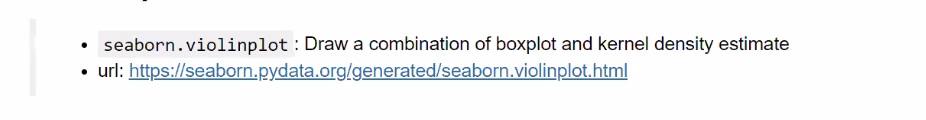

In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:ylabel='total_bill'>

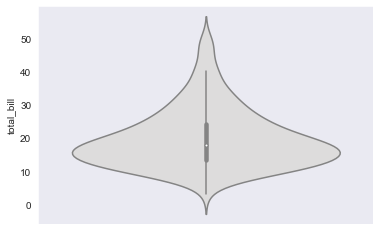

In [40]:
# Sự phân bố của thuộc tính total_bill
sns.violinplot(y=tips['total_bill'], palette='coolwarm')

**Nhận xét:**
+ Nhìn tổng quan biểu đồ: giá trị hóa đơn nhỏ nhất là 0.5 đô, giá trị hóa đơn cao nhất khoảng 55 đô, phình to nhất ở khoảng 10 - 20 đô
+ Thanh đậm là IQR Score, điểm trắng là median
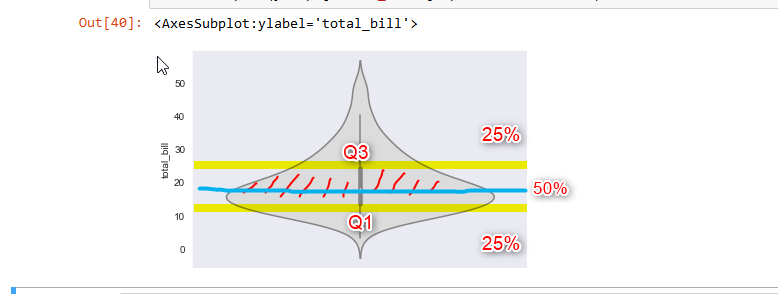

<AxesSubplot:xlabel='day', ylabel='total_bill'>

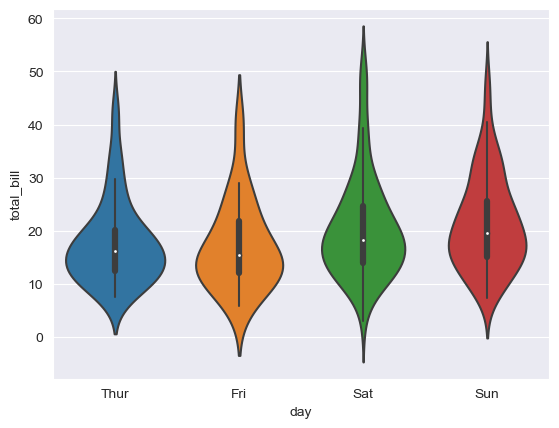

In [7]:
# Sự phân bố total_bill theo ngày
sns.violinplot(x='day', y='total_bill', data=tips)

In [41]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

**Kết luận**:
- Nhìn vào 4 hình, ngày chủ nhật cao hơn so với các ngày khác, thứ 7 đứng thứ hai, thứ 5 và 6 ngang nhau
- Khách hàng có xu hướng chi tiêu nhiều hơn vào cuối tuần
- Thứ 7 có nhiều loại khách hàng hơn, dùng nhiều loại dịch vụ hơn (độ phân bố hóa đơn 0.5 đô cũng có)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

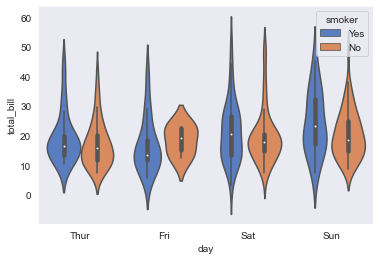

In [42]:
# Sự phân bố total_bill theo ngày và giới tính
sns.violinplot(x='day', y='total_bill', hue='smoker',data=tips, palette='muted')

**Kết luận:**
Thứ 6 có sự khác biệt giữa 2 nhóm hút thuốc và không hút thuốc
- Nhóm không hút thuốc chi nhiều hoá đơn hơn: Giao động dữ liệu cao hơn
- Nhóm hút thuốc đa dạng hoá đơn

<AxesSubplot:xlabel='day', ylabel='total_bill'>

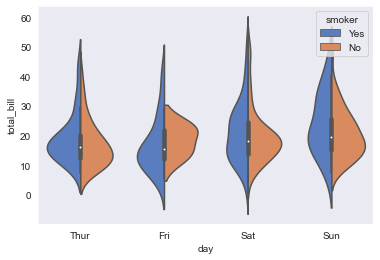

In [43]:
# split = True: lấy 1/2 ghép lại, nhìn gọn hơn
sns.violinplot(x='day', y='total_bill', hue='smoker',data=tips, palette='muted', split=True)

In [10]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

<AxesSubplot:xlabel='time', ylabel='total_bill'>

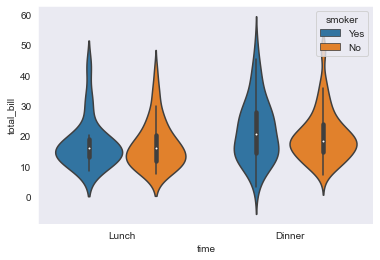

In [44]:
# Kiểm soát thứ tự các violinplot bằng cách truyền  một thứ tự nhãn cụ thể
sns.violinplot(x='time', y='total_bill', hue='smoker',data=tips, order=['Lunch', 'Dinner'])

### **3. Biểu đồ tần số**

<AxesSubplot:xlabel='sex', ylabel='count'>

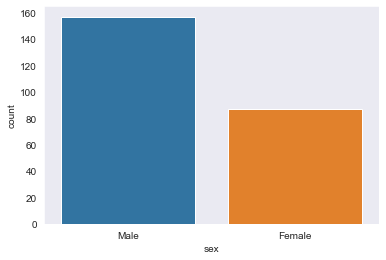

In [45]:
# Hiển thị tần số của mỗi loại giới tính trong bộ dữ liệu
sns.countplot(x='sex', data=tips)

In [46]:
# Nếu không dùng seaborn, thiết lập nhiều tham số
female = tips[tips.sex == 'Female']['sex'].count()
male = tips[tips.sex == 'Male']['sex'].count()

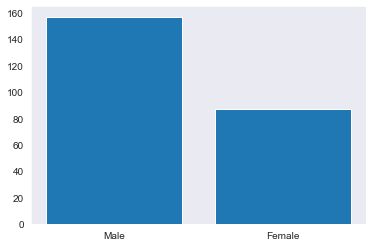

In [47]:
plt.bar(['Male', 'Female'], [male, female])
plt.show()

**Kết luận:**
- Số lượng nam gấp đôi nữ, có thể là quán bia

<AxesSubplot:xlabel='sex', ylabel='count'>

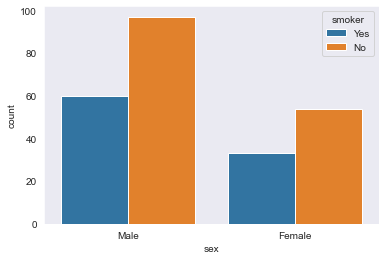

In [48]:
# Hiển thị số lượng theo phân loại
sns.countplot(x='sex', hue='smoker', data=tips)

<AxesSubplot:xlabel='count', ylabel='sex'>

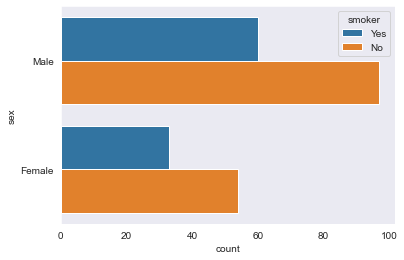

In [49]:
# Vẽ biểu đồ theo chiều ngang
# Đổi giá trị x thành y, xoay 90 độ
sns.countplot(y='sex', hue='smoker', data=tips)

### **4. Biểu đồ heatmap**

In [51]:
import numpy as np
uniform_data = np.random.rand(10, 12)
uniform_data

array([[0.71513038, 0.79355221, 0.60394729, 0.65080445, 0.47035822,
        0.96936911, 0.34753264, 0.21595182, 0.18885321, 0.40572345,
        0.73781829, 0.26002855],
       [0.15904045, 0.44187937, 0.67572332, 0.50809553, 0.51828463,
        0.16743885, 0.76876251, 0.52340041, 0.38073036, 0.51438367,
        0.00176827, 0.27517144],
       [0.20890214, 0.665967  , 0.27082457, 0.28797853, 0.51454453,
        0.4574935 , 0.07721061, 0.82349768, 0.49465577, 0.29895739,
        0.94375277, 0.93039513],
       [0.38743354, 0.33838176, 0.72469315, 0.17822453, 0.25850328,
        0.16356268, 0.35876133, 0.97237222, 0.81061913, 0.76470875,
        0.84700155, 0.26469088],
       [0.8023412 , 0.70216232, 0.08834443, 0.58370097, 0.58612947,
        0.22836333, 0.12058311, 0.40048309, 0.14785727, 0.62906754,
        0.73039089, 0.60611256],
       [0.79442574, 0.34013309, 0.10233344, 0.42879683, 0.62842369,
        0.60366194, 0.5189556 , 0.09950468, 0.63072459, 0.78664757,
        0.15719253,

<AxesSubplot:>

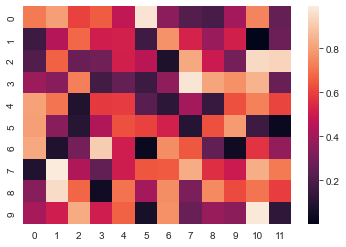

In [52]:
sns.heatmap(uniform_data)

**Kết luận:**
- Biểu độ màu cho thấy sự phân bố dữ liệu, giá trị to nhỏ của dữ liệu
- Thanh bar map bên phải: càng đen giá trị càng nhỏ, càng nhạt giá trị càng lớn gần bằng 1

<AxesSubplot:>

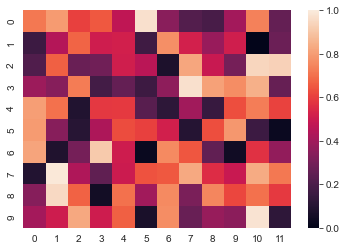

In [64]:
# Thay đổi giới hạn màu sắc
sns.heatmap(uniform_data, vmin=0, vmax=1)

### **5. Biểu đồ Box plot**

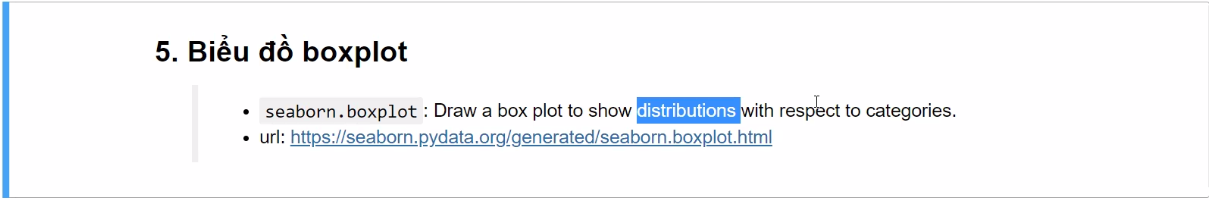

<AxesSubplot:xlabel='total_bill'>

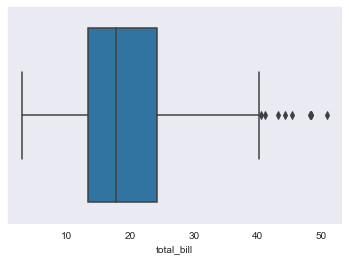

In [54]:
# Vẽ biểu đồ box plot cho thuộc tính total_bill
# Boxplot: Không cho thấy tần suất xuất hiện nhưng cho thấy cả giá trị ngoại lai
sns.boxplot(x=tips['total_bill'])

**Nhận xét:**
+ Số ít khách hàng chi bill trên 40, không đại diện cho số đông (Có những giá trị ngoại lai là giá trị thật nhưng là giá trị thiểu số)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

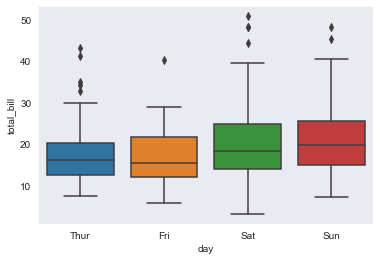

In [55]:
# Vẽ phân nhóm theo ngày
sns.boxplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

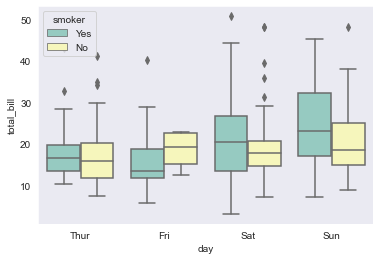

In [57]:
# Phân loại theo nhiều nhóm
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='Set3')

**Nhận xét:**
+ Ngày t7 có nhiều giá trị ngoại lai --> có nhiều khách hàng chi nhiều tiền bất thường hơn do tâm trạng tốt hơn chẳng hạn
+ Khách hàng không hút thuốc có nhiều giá trị ngoại lai hơn

<AxesSubplot:xlabel='day', ylabel='total_bill'>

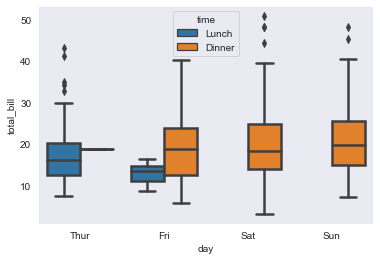

In [56]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips, linewidth=2.5)

**Nhận xét:**
- T5 chỉ có 1 vạch chứng tỏ dữ liệu cho Dinner có rất ít dữ liệu hoặc khuyết thiếu
- T7 và Cn tương tự, không có dữ liệu ăn trưa

### **6. Biểu đồ cặp**

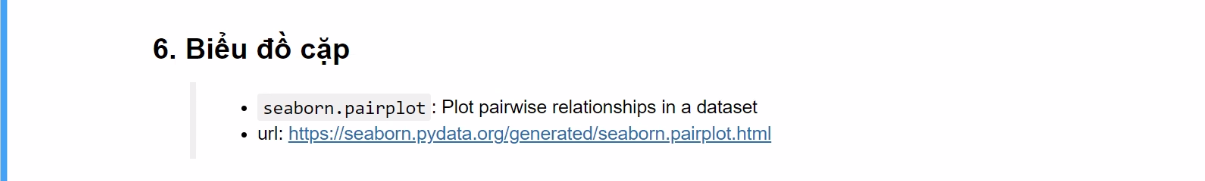

In [59]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

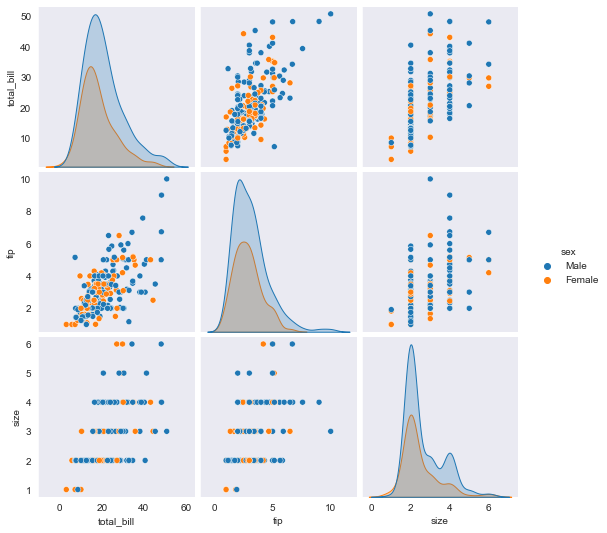

In [61]:
# pairlot dựng tất cả dữ liệu định lượng, các kiểu cột định tính bỏ qua
# Sử dụng pairlot với dữ liệu ít vì nếu không nó xây dựng 1 loạt biểu đồ, tốn nhiều tài nguyên
sns.pairplot(tips, hue='sex')

**Nhận xét:**
+ Biểu đồ 1: total_bill vs sex: nam chi nhiều hơn nữ
+ Khách hàng đi theo cặp rất nhiều --> bố trí bàn 2-3 người ngồi

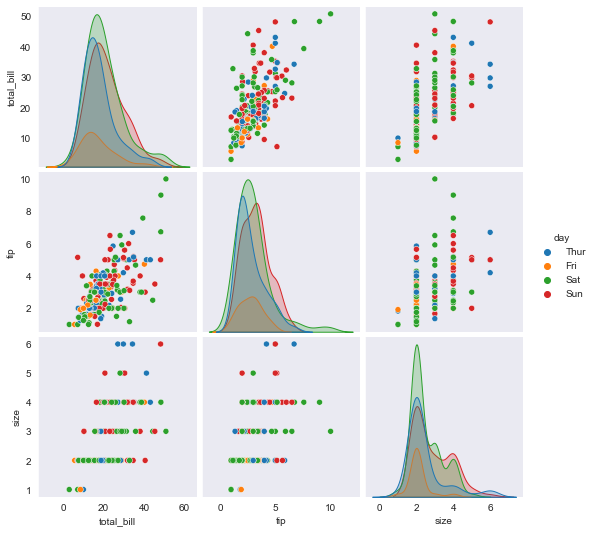

In [63]:
sns.pairplot(tips, hue='day')

**See also:** https://www.mygreatlearning.com/blog/seaborn-tutorial/

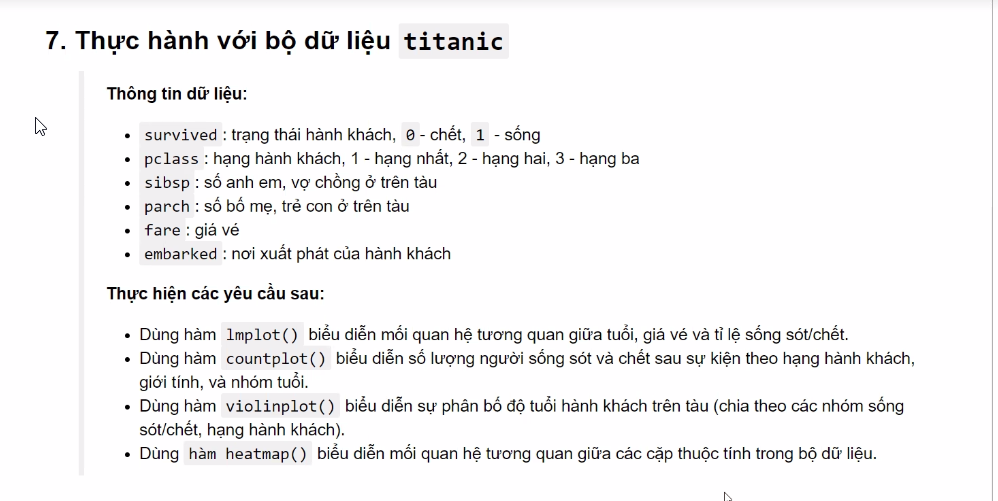

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


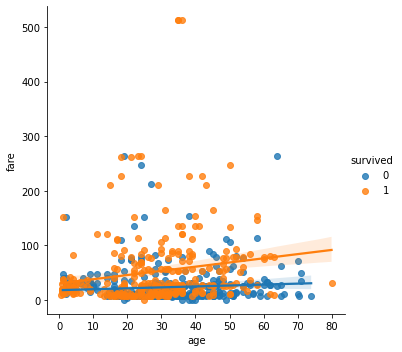

In [5]:
sns.lmplot(x='age', y='fare', hue='survived', data=titanic)

In [ ]:
# Bài sửa

In [ ]:
axes = sns.lmplot(x='age', y='fare', hue='survived', data=_data, legend=False)
axes.set(title='Biểu đồ biểu diễn tương quan giữa tuổi và giá vé', ylabel='Gía vé', xlabel='Tuổi')
plt.legend(loc='upper right', labels=['Chết', 'Sống sót'])
plt.show()

**Nhận xét:**
- Mối quan hệ tuyến tính giữa giá vé và tuổi không liên quan nhau, không ảnh hưởng đến nhau

In [11]:
# Hiển thị số lượng người sống sót theo hạng hành khách

<AxesSubplot:xlabel='pclass', ylabel='count'>

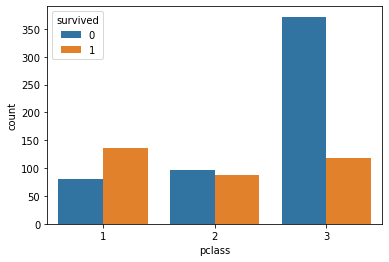

In [10]:
sns.countplot(x='pclass', hue='survived', data=titanic)

In [ ]:
# Bài sửa

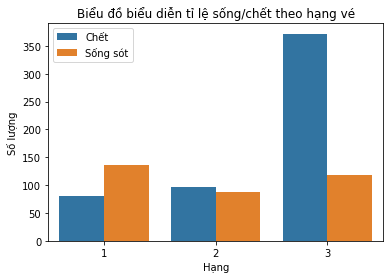

In [28]:
axes = sns.countplot(x='pclass', hue='survived', data=titanic)
axes.set(title='Biểu đồ biểu diễn tỉ lệ sống/chết theo hạng vé', ylabel='Số lượng', xlabel='Hạng')
plt.legend(loc='upper left', labels=['Chết', 'Sống sót'])
plt.show()

**Nhận xét:**
+ Tỉ lệ chết ở hạng 3 nhiều nhất
+ Tỉ lệ sống ở 3 hạng ngang nhau

In [7]:
# Hiển thị số lượng người sống sót và chết theo giới tính

<AxesSubplot:xlabel='sex', ylabel='count'>

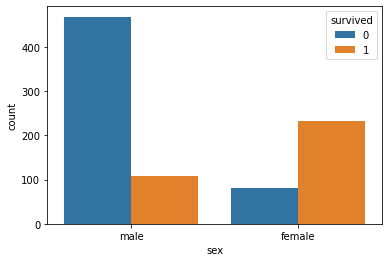

In [16]:
sns.countplot(x='sex', hue='survived', data=titanic)

In [ ]:
# Bài sửa 

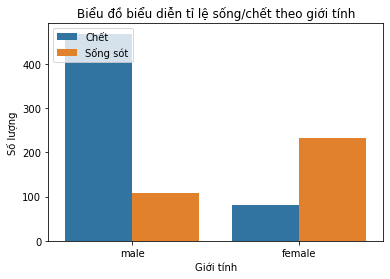

In [25]:
axes = sns.countplot(x='sex', hue='survived', data=titanic)
axes.set(title='Biểu đồ biểu diễn tỉ lệ sống/chết theo giới tính', ylabel='Số lượng', xlabel='Giới tính')
plt.legend(loc='upper left', labels=['Chết', 'Sống sót'])
plt.show()

**Nhận xét:**
+ Tỉ lệ người mất là nam gấp 4 lần nữ
+ Tỉ lệ người sống là nữ gấp 2.5 lần nam

In [21]:
age_bin = [0,18,35,60,100]
labels = ['Trẻ con', 'Thanh niên', 'Người lớn', 'Người già']

titanic['age_group'] = pd.cut(titanic['age'], bins=age_bin, labels=labels)

In [22]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,Thanh niên
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,Thanh niên
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,Thanh niên
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,Thanh niên


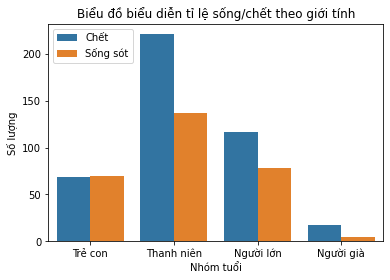

In [24]:
axes = sns.countplot(x='age_group', hue='survived', data=titanic)
axes.set(title='Biểu đồ biểu diễn tỉ lệ sống/chết theo giới tính', ylabel='Số lượng', xlabel='Nhóm tuổi')
plt.legend(loc='upper left', labels=['Chết', 'Sống sót'])
plt.show()

**Nhận xét:**

In [ ]:
# Hiển thị sự phân bố độ tuổi hành khách trên tàu chia theo các nhóm sống sót/chết, hạng hành khách

<AxesSubplot:xlabel='class', ylabel='age'>

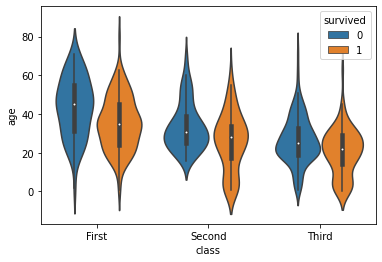

In [30]:
sns.violinplot(y='age', x='class', hue='survived', data=titanic)

In [ ]:
# Dùng hàm heatmap() biểu diễn mối quan hệ tương quan giữa các cặp thuộc tính trong bộ dữ liệu

In [33]:
corr = titanic.corr()

+ Gía trị âm: Gía trị nghịch --> Gía trị kia tăng, thì giá trị kia giảm
+ Gía trị dương: Gía trị thuận --> Cùng tăng hoặc cùng giảm
+ 2 giá trị gần bằng 0: 2 mqh k có liên quan

<AxesSubplot:>

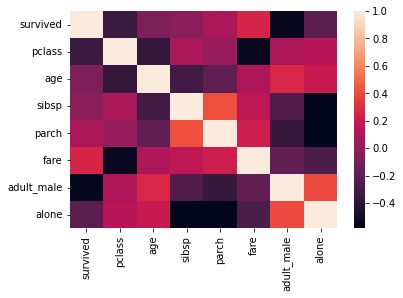

In [34]:
sns.heatmap(corr)

**Nhận xét:**
+ Rất ít các cặp có mqh tuyến tính
+ Các mqh đang nghịch như: 

Ví dụ: 
+ survived vs adult_male: nếu là ng lớn con trai càng trẻ thì tỉ lệ chết càng cao
+ pclass càng cao thì fare càng nhỏ (hạng 3 giá vẻ rõ nhất)